In [13]:
!pip install tabulate colorama
from math import sqrt,pi,log
import pandas as pd
from tabulate import tabulate
from colorama import Fore, Style
from math import log,fabs

Una mezcla de 33 % de n-hexano, 37 % de n-heptano y 30% de n-octano se va a destilar para dar un destilado de 0.01 n-heptano (Fracción molar) y en el fondo una concentración de 0.01 de n-hexano (Fracción molar). La columna operará a 1.2 atm. Calcula la composición completa de productos y el número mínimo ideal de platos a reflujo infinito.

Para este caso se desinga al n-hexano como LK, al n-heptano como HK y al n-octano como NHK (ya que se piensa que en su mayoría irá al fondo).
La composición de los productos se encuentran por medio de un balance de masa, asumiendo que en el destilado no hay n-octano y 0.99 por ciento de n-hexano. Se toma de base de cálculo 100 mol/h.

En base al método de Underwood, calcule el número ideal de etapas si la razón de reflujo es 1.5 RDm. La alimentación es líquido saturado

In [18]:
#Balance sobre n-hexano
F=100 #mol/h

xD=[0.99,0.01,0]
xB=0.01
xF=[0.33,0.37,0.30]
alphas=[2.21,1.0,0.457]


def Dt(F,xF,xD,xB):
  return (F*(xF-xB))/(xD-xB)

def Bt(F,D):
  return F-D

D=Dt(F,xF[0],xD[0],xB) #Cálculo del flujo en el domo
B=Bt(F,D) #Cálculo del flujo en los fondos
Componente=["N-Hexano","N-Heptano","N-Octano"]
Feed=[F*xF[0],F*xF[1],F*xF[2]] #Moles de alimentación
K=[2.23,1.01,0.462] #Valor de K
molD=[xD[0]*D,xD[1]*D,xD[2]*D] #Moles de Destilado
molB=[Feed[0]-molD[0],Feed[1]-molD[1],Feed[2]-molD[2]] #Moles de fondos
xBbis=[xB,molB[1]/B,molB[2]/B] #Fracción molar en fondos

def alpha(HK,LK):
  return LK/HK

alphaij=alpha(K[1],K[0]) #Cálculo de alfa

def Nmin(xDi,xBi,xDj,xBj,alphaij):
  return ((log((xDi/xBi)/(xDj/xBj)))/log(alphaij))-1

N_min=Nmin(xD[0],xBbis[0],xD[1],xBbis[1],alphaij) #Cálculo del no. mínimo de platos




data = {
  "Componente": Componente,
  "Alimentación (mol/h)": Feed,
  "Destilado (mol/h)": molD,
  "xD":xD,
  "Fondo (mol/h)":molB,
  "xB": xBbis,
  "K": K,
  "alpha":alphas

}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)

print("El número mínimo de platos es: %.4f"%(N_min))
q=1 #Condición q de alimentación de líquido saturado

def phi1(alpha0, alpha1, alpha2, xF0, xF1, xF2, q, phi):
  return -1+q+((alpha0*xF0)/(alpha0-phi))+((alpha1*xF1)/(alpha1-phi))+((alpha2*xF2)/(alpha2-phi))

M=100
TOL=0.000001
p0=1.05
p1=1.08
def g(p0,p1,fx1,fx0):
  return p1-(fx1*(p1-p0))/(fx1-fx0)

for i in range(M): #Se genera un proceso iterativo para determinar el valor de phi
  phix=phi1(alphas[0],alphas[1],alphas[2],xF[0],xF[1],xF[2],q,p0)
  phiy=phi1(alphas[0],alphas[1],alphas[2],xF[0],xF[1],xF[2],q,p1)

  p=g(p0,p1,phiy,phix)
  if fabs(p-p1)<TOL:
    break
  else:
    p0=p1
    p1=p

print("El valor de phi es. %.4f"%p0)

def RDmin(alpha0, alpha1, alpha2, xD0, xD1, xD2, phi):
  return -1+((alpha0*xD0)/(alpha0-phi))+((alpha1*xD1)/(alpha1-phi))+((alpha2*xD2)/(alpha2-phi))

Rmin=RDmin(alphas[0],alphas[1],alphas[2],xD[0],xD[1],xD[2],p0) #Conocida phi, evaluar para conocer la razón de reflujo mínima
Veces=1.5 #La razón real se conoce al multiplicar la razón de reflujo mínimo por el no. de veces que es la razón real con respecto a la mínima
print("Razón de reflujo: %.4f "%(Rmin*Veces))

def xaxis(RD,Rmin): #Función que permite leer el eje x de la correlación de Gilliland
  return (RD-Rmin)/(RD+1)

print("El valor a leer en el eje x de la correlación de Gilliland es: %.4f"%(xaxis((Rmin*Veces),Rmin)))


+----+--------------+------------------------+---------------------+------+-----------------+----------+-------+---------+│
|    | Componente   |   Alimentación (mol/h) |   Destilado (mol/h) |   xD |   Fondo (mol/h) |       xB |     K |   alpha |│
+====+==============+========================+=====================+======+=================+==========+=======+=========+│
|  0 | N-Hexano     |                     33 |           32.3265   | 0.99 |        0.673469 | 0.01     | 2.23  |   2.21  |│
+----+--------------+------------------------+---------------------+------+-----------------+----------+-------+---------+│
|  1 | N-Heptano    |                     37 |            0.326531 | 0.01 |       36.6735   | 0.544545 | 1.01  |   1     |│
+----+--------------+------------------------+---------------------+------+-----------------+----------+-------+---------+│
|  2 | N-Octano     |                     30 |            0        | 0    |       30        | 0.445455 | 0.462 |   0.457 |│
+----+--

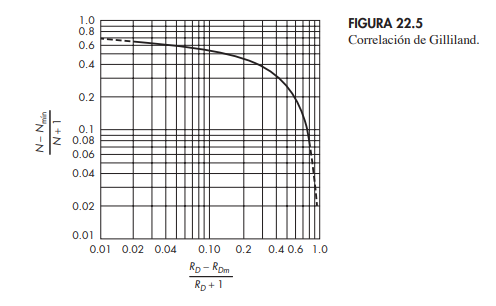

In [23]:
yaxis=float(input("Inserte el valor del eje y leído en la correlación de Gilliland:"))

def yaxisi(Nmin,yaxis): #Función que convierte lo leído en el eje y de la correlación de Gilliland en el no. de etapas ideales
  return (Nmin+yaxis)/(1-yaxis)

N=yaxisi(N_min+1,yaxis)

print("La columna debe tener %.d platos ideales"%N)

Inserte el valor del eje y leído en la correlación de Gilliland:0.41
La columna debe tener 19 platos ideales
